In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression


# Load the datasets
pizza_sales = pd.read_excel(r'C:\Users\NAGARAJAN K\Downloads\Pizza_Sale.xlsx')
pizza_ingredients = pd.read_excel(r"C:\Users\NAGARAJAN K\Downloads\Pizza_ingredients.xlsx")

# Display the first few rows to understand the structure of the data
print(pizza_sales.head())
print(pizza_ingredients.head())


   pizza_id  order_id  pizza_name_id  quantity           order_date  \
0         1         1     hawaiian_m         1  2015-01-01 00:00:00   
1         2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2         3         2  five_cheese_l         1  2015-01-01 00:00:00   
3         4         2    ital_supr_l         1  2015-01-01 00:00:00   
4         5         2     mexicana_m         1  2015-01-01 00:00:00   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2 

In [ ]:
import pandas as pd  # For loading, transforming, and analyzing structured data using DataFrames.
import numpy as np  # For numerical computations, especially arrays and matrix operations.
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data.
import seaborn as sns  # For enhanced statistical data visualization, built on matplotlib.
from sklearn.model_selection import train_test_split  # To split datasets into training and test sets.
from sklearn.metrics import mean_absolute_percentage_error  # To evaluate model accuracy using MAPE metric.
from statsmodels.tsa.statespace.sarimax import SARIMAX  # For building SARIMA models for time series forecasting.
from sklearn.linear_model import LinearRegression  # For applying simple and multiple linear regression.
from sklearn.preprocessing import LabelEncoder  # To convert categorical values into numerical labels.
import joblib  # For saving and loading machine learning models and scalers efficiently.
import os  # For interacting with the operating system, like file paths and directories.
from prophet import Prophet  # For time series forecasting with trends, seasonality, and holidays.
from tensorflow.keras.models import Sequential  # For building neural networks sequentially layer by layer.
from tensorflow.keras.layers import LSTM, Dense, Input  # For defining LSTM, Dense (fully connected), and input layers in neural networks.
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator  # To generate input/output samples from time series for model training.


In [83]:
pizza_sales.isnull().sum()
#pizza_ingredients.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

# Data cleaning

In [84]:

# Create DataFrame
df = pd.DataFrame(pizza_sales)

# Function to fill missing values in column 'C'
for index, row in df[df['pizza_name_id'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']].values
    # Find matching rows
    matching_row = df[(df[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']] == values_to_match).all(axis=1) & df['pizza_name_id'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df.at[index, 'pizza_name_id'] = matching_row['pizza_name_id'].iloc[0]

# Output the updated DataFrame
print(df)


       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

In [85]:
pizza_sales_1=df

In [86]:
pizza_sales_1.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [87]:

# Create DataFrame
df1 = pd.DataFrame(pizza_sales_1)

# Function to fill missing values in column 'C'
for index, row in df1[df1['pizza_name'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df1[(df1[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name_id']] == values_to_match).all(axis=1) & df1['pizza_name'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df1.at[index, 'pizza_name'] = matching_row['pizza_name'].iloc[0]

# Output the updated DataFrame
print(df1)

       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

In [88]:
pizza_sales_2=df1
pizza_sales_2.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            0
dtype: int64

In [89]:
# Create DataFrame
df2 = pd.DataFrame(pizza_sales_2)

# Function to fill missing values in column 'C'
for index, row in df2[df2['pizza_ingredients'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_name', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df2[(df2[['pizza_size', 'pizza_category', 'pizza_name', 'pizza_name_id']] == values_to_match).all(axis=1) & df2['pizza_ingredients'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df2.at[index, 'pizza_ingredients'] = matching_row['pizza_ingredients'].iloc[0]

# Create DataFrame
df3 = pd.DataFrame(df2)

# Function to fill missing values in column 'C'
for index, row in df3[df3['pizza_category'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_ingredients', 'pizza_name', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df3[(df3[['pizza_size', 'pizza_ingredients', 'pizza_name', 'pizza_name_id']] == values_to_match).all(axis=1) & df3['pizza_category'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df3.at[index, 'pizza_category'] = matching_row['pizza_category'].iloc[0]

# Output the updated DataFrame
print(df3)
df3.isnull().sum()

       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          7
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [90]:
df3['total_price'] = df3['total_price'].fillna(df3['quantity'] * df3['unit_price'])

df3.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [91]:
pizza_sales_cleaned=df3
pizza_sales_cleaned.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_sales_cleaned.xlsx",index=False)
print("done")

done


In [92]:
# Load your Excel file
df = pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_sales_cleaned.xlsx")

# Create a copy for outlier flags
outliers = pd.DataFrame(index=df.index)

# Store bounds (optional, for debugging or insights)
bounds_info = {}

# IQR method applied to numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col + '_outlier'] = (df[col] < lower) | (df[col] > upper)
    
    # Save bounds for reference (optional)
    bounds_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'lower': lower, 'upper': upper}

# Filter rows where any outlier is True
df_outliers = df[outliers.any(axis=1)]

# Concatenate original data with outlier flags for insight
df_combined = pd.concat([df, outliers], axis=1)

# Output the result
print("Total outlier rows:", df_outliers.shape[0])
print(df_outliers)

# Optional: Save results
df_combined.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\with_outlier_flags.xlsx", index=False)
df_outliers.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\only_outliers.xlsx", index=False)


Total outlier rows: 955
       pizza_id  order_id   pizza_name_id  quantity           order_date  \
48           49        17  mediterraneo_m         2  2015-01-01 00:00:00   
183         184        78    spicy_ital_l         3  2015-02-01 00:00:00   
211         212        91       bbq_ckn_l         2  2015-02-01 00:00:00   
222         223        92     the_greek_m         2  2015-02-01 00:00:00   
245         246       105      hawaiian_s         2  2015-02-01 00:00:00   
...         ...       ...             ...       ...                  ...   
48461     48462     21285    spin_pesto_s         2           31-12-2015   
48466     48467     21288   classic_dlx_m         3           31-12-2015   
48495     48496     21298      big_meat_s         2           31-12-2015   
48575     48576     21331       bbq_ckn_l         2           31-12-2015   
48601     48602     21343    spicy_ital_l         2           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_cate

In [36]:
pizza_ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [93]:

df4 = pd.DataFrame(pizza_ingredients)

# Function to fill missing values in column D based on the rule
def fill_column_d(row, df4):
    # Check if current row's column C is "sliced ham" and column D is null
    if row['pizza_ingredients'] == 'Sliced Ham' and pd.isnull(row['Items_Qty_In_Grams']):
        # Find the corresponding "Mozzarella Cheese" row where A and B match
        mozzarella_row = df4[(df4['pizza_ingredients'] == 'Mozzarella Cheese') & 
                            (df4['pizza_name_id'] == row['pizza_name_id']) & 
                            (df4['pizza_name'] == row['pizza_name'])]
        
        # If a matching row is found
        if not mozzarella_row.empty:
            # Get the value from column D of the Mozzarella Cheese row
            mozzarella_d_value = mozzarella_row['Items_Qty_In_Grams'].values[0]
            
            # Set the value of D for "sliced ham" as 1.5 times the Mozzarella Cheese D value
            return mozzarella_d_value * 1.5
    
    # If no matching row is found, return the original value of D (or you can set it to some default)
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values in column D
df4['Items_Qty_In_Grams'] = df4.apply(lambda row: fill_column_d(row, df4), axis=1)




# Function to fill missing value in column D by averaging column D for matching A and B
def fill_column_d_for_caramelized_onions(row, df4):
    if row['pizza_ingredients'] == 'Caramelized Onions' and pd.isnull(row['Items_Qty_In_Grams']):
        # Find rows where A and B match the current row
        matching_rows = df4[(df4['pizza_name_id'] == row['pizza_name_id']) & (df4['pizza_name'] == row['pizza_name']) & (df4['pizza_ingredients'] != 'Caramelized Onions')]
        
        # Calculate the average of the matching rows in column D
        if not matching_rows.empty:
            avg_d = matching_rows['Items_Qty_In_Grams'].mean()
            return avg_d
    
    # Return the original value if it's not the Caramelized Onions row or it doesn't need filling
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values in column D
df4['Items_Qty_In_Grams'] = df4.apply(lambda row: fill_column_d_for_caramelized_onions(row, df4), axis=1)

# Display the updated DataFrame


# Display the updated DataFrame
print(df4.isnull().sum())
pizza_ingredients_cleaned=df4
pizza_ingredients_cleaned.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_ingredients_cleaned.xlsx",index=False)

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64


In [94]:
pizza_sales_cleaned['pizza_name_id'].nunique()

91

In [95]:
pizza_ingredients_cleaned['pizza_name_id'].nunique()

91

merging sales data and ingredients data based on pizza_name_id

# Feature engineering

In [175]:
from sklearn.preprocessing import LabelEncoder
import joblib
import os

feature_engineering= pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_sales_cleaned.xlsx")
# order_date to date time
feature_engineering['order_date']=pd.to_datetime(feature_engineering['order_date'],errors='coerce')
# day of week
feature_engineering['day_of_week'] = feature_engineering['order_date'].dt.dayofweek
#order hour
feature_engineering['order_hour'] = pd.to_datetime(feature_engineering['order_time'], format='%H:%M:%S', errors='coerce').dt.hour
# order month
feature_engineering['month']=feature_engineering['order_date'].dt.month
#num_ingredients
feature_engineering['num_ingredients']=feature_engineering['pizza_ingredients'].apply(lambda x: len(str(x).split(",")))
# weekend
feature_engineering['is_weekend']=feature_engineering['day_of_week'].isin([5,6]).astype(int)


# encoding

Label_Encoder={}
for i in ['pizza_size','pizza_category','pizza_name_id']:
    le =LabelEncoder()
    feature_engineering[i+"encoded"]=le.fit_transform(feature_engineering[i])
    joblib.dump(le,f'C:/Users/NAGARAJAN K/Desktop/pizza projetc/{i}.pkl')
    Label_Encoder[i]=le

feature_engineering.to_pickle("feature_engineered.pkl")
feature_engineering.to_excel("featured_data.xlsx",index=False)
print("✅ Feature engineering complete and encoders saved in 'encoders/' folder.")




✅ Feature engineering complete and encoders saved in 'encoders/' folder.


# eda

In [176]:
import pandas as pd
import seaborn as sns

# Load your engineered dataset
for_eda = pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\featured_data.xlsx")

# Overview
print(for_eda.info())
print(for_eda.describe())
print(for_eda.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pizza_id               48620 non-null  int64         
 1   order_id               48620 non-null  int64         
 2   pizza_name_id          48620 non-null  object        
 3   quantity               48620 non-null  int64         
 4   order_date             48620 non-null  datetime64[ns]
 5   order_time             48620 non-null  object        
 6   unit_price             48620 non-null  float64       
 7   total_price            48620 non-null  float64       
 8   pizza_size             48620 non-null  object        
 9   pizza_category         48620 non-null  object        
 10  pizza_ingredients      48620 non-null  object        
 11  pizza_name             48620 non-null  object        
 12  day_of_week            48620 non-null  int64         
 13  o

In [177]:
for_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pizza_id               48620 non-null  int64         
 1   order_id               48620 non-null  int64         
 2   pizza_name_id          48620 non-null  object        
 3   quantity               48620 non-null  int64         
 4   order_date             48620 non-null  datetime64[ns]
 5   order_time             48620 non-null  object        
 6   unit_price             48620 non-null  float64       
 7   total_price            48620 non-null  float64       
 8   pizza_size             48620 non-null  object        
 9   pizza_category         48620 non-null  object        
 10  pizza_ingredients      48620 non-null  object        
 11  pizza_name             48620 non-null  object        
 12  day_of_week            48620 non-null  int64         
 13  o

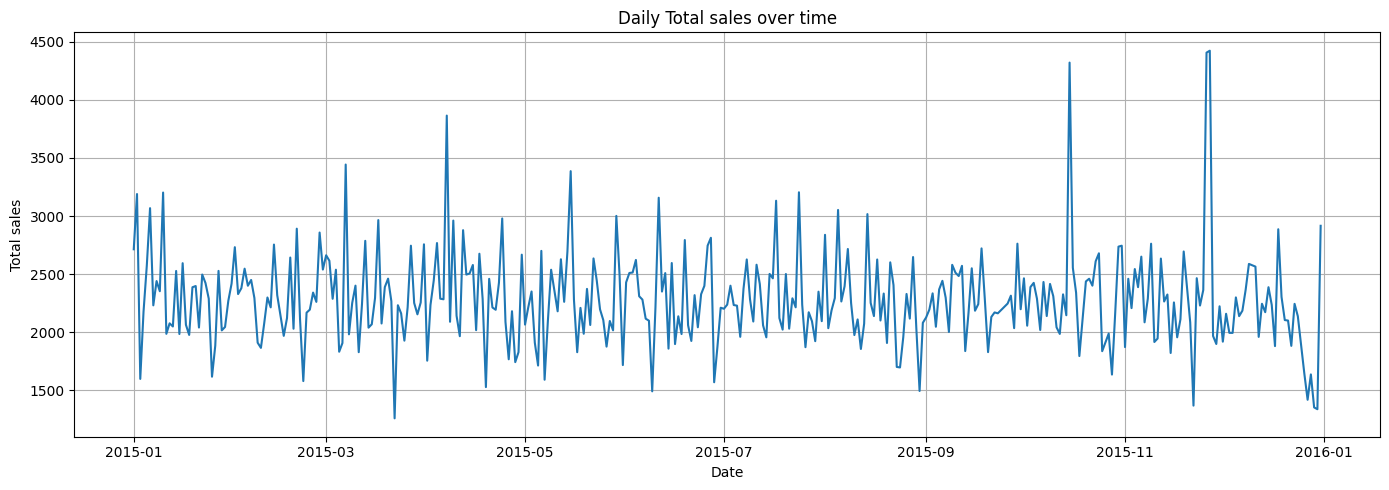

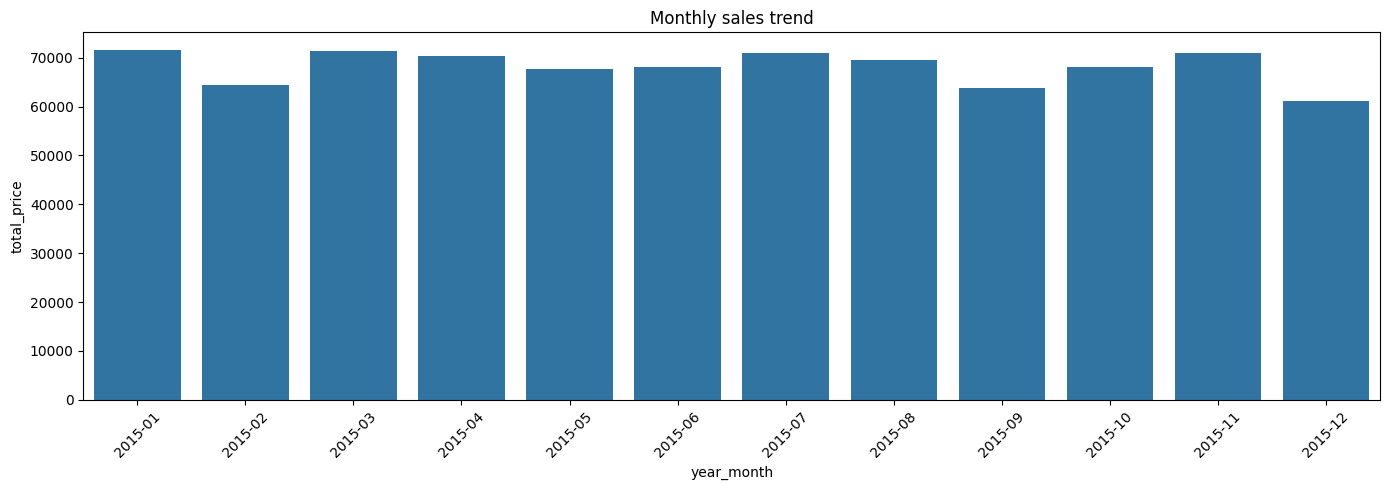

Average sold price per month 68155


In [168]:
import matplotlib.pyplot as plt
daily_sales=for_eda.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(14,5))
plt.plot(daily_sales['order_date'],daily_sales['total_price'])
plt.title("Daily Total sales over time")
plt.xlabel("Date")
plt.ylabel("Total sales")
plt.grid(True)
plt.tight_layout()
plt.show()

for_eda['year_month']=for_eda["order_date"].dt.to_period("M")
monthly_sales=for_eda.groupby("year_month")["total_price"].sum().reset_index()
plt.figure(figsize=(14,5))
sns.barplot(x='year_month',y='total_price', data= monthly_sales)
plt.xticks(rotation=45)
plt.title("Monthly sales trend")
plt.tight_layout()
plt.show()
rounded=round(monthly_sales['total_price'].mean())

print('Average sold price per month',rounded)


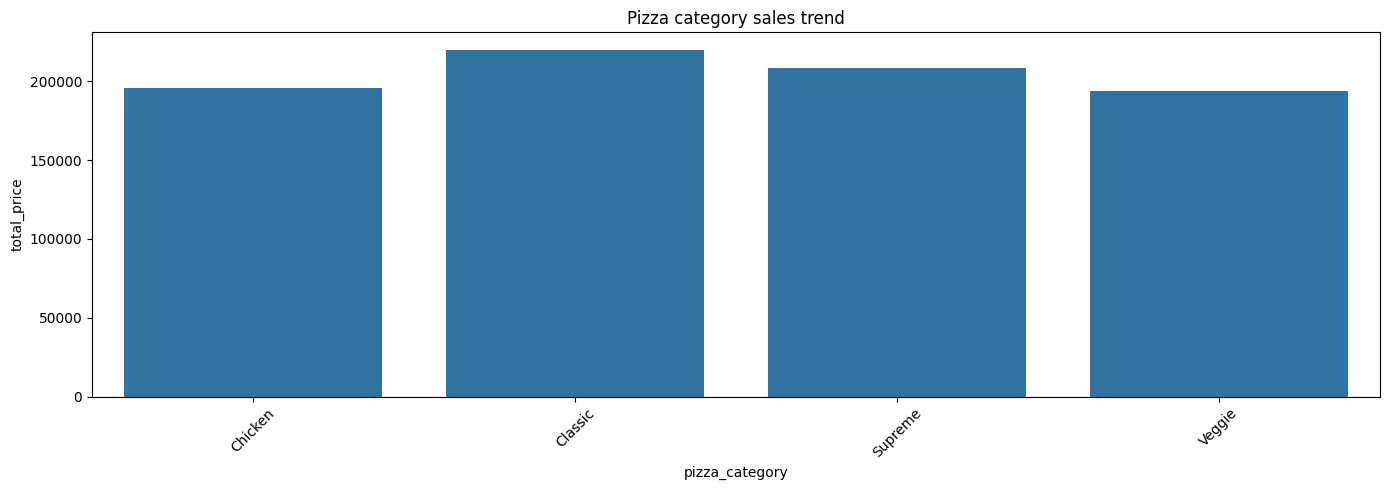

In [170]:
daily_sales=for_eda.groupby('pizza_category')['total_price'].sum().reset_index()
plt.figure(figsize=(14,5))
sns.barplot(x='pizza_category',y='total_price', data= daily_sales)
plt.xticks(rotation=45)
plt.title("Pizza category sales trend")
plt.tight_layout()
plt.show()


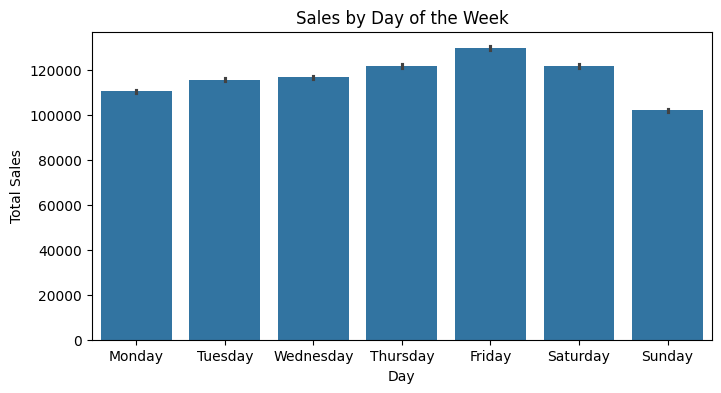

In [99]:
plt.figure(figsize=(8, 4))
sns.barplot(data=for_eda, x='day_of_week', y='total_price', estimator='sum', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xlabel('Day')
plt.show()


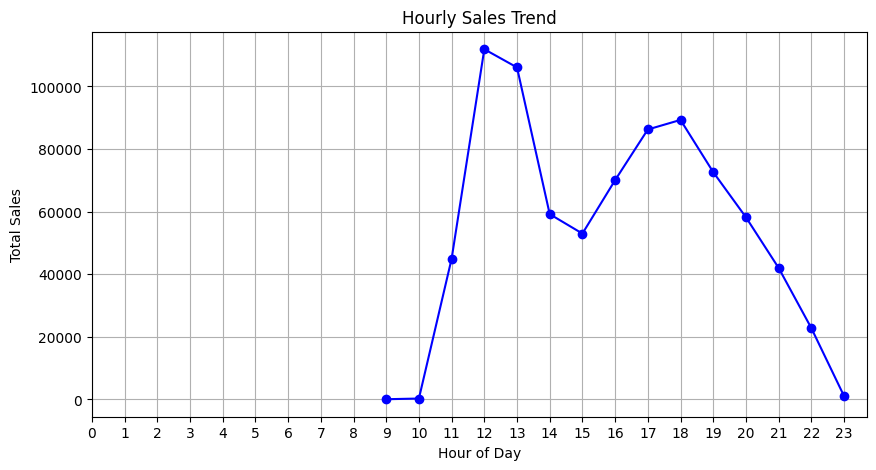

In [100]:
# Pre-aggregate sales by hour
hourly_sales = for_eda.groupby('order_hour')['total_price'].sum().reset_index()

# Plot using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales['order_hour'], hourly_sales['total_price'], marker='o', linestyle='-', color='blue')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


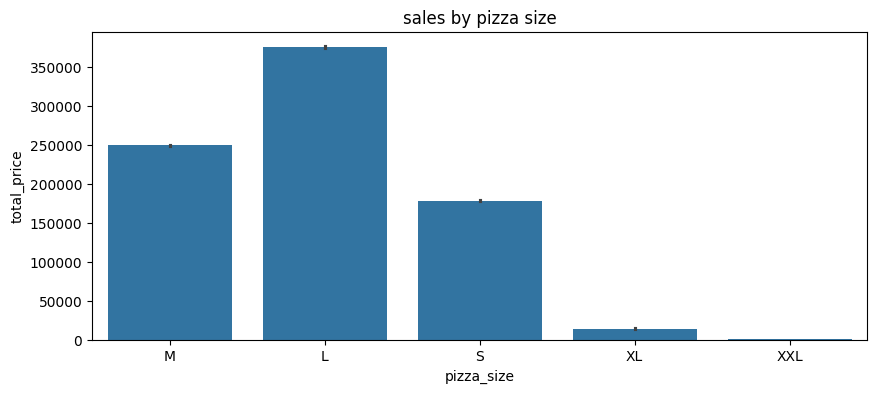

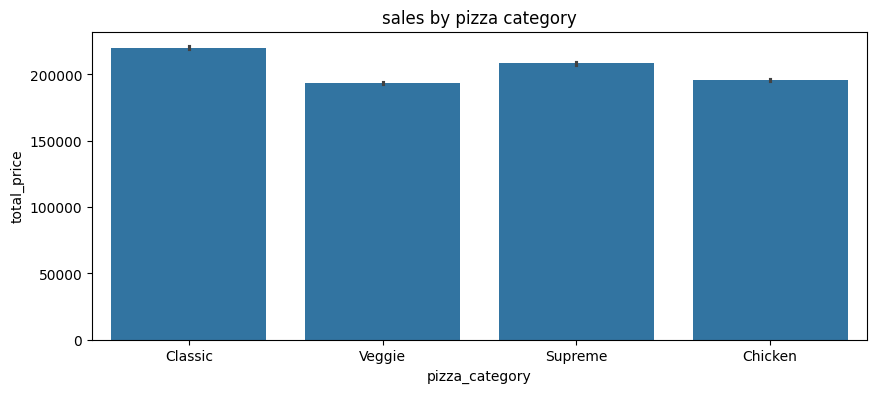

In [101]:
plt.figure(figsize=(10,4))
sns.barplot(data=for_eda,x='pizza_size',y='total_price',estimator='sum')
plt.title('sales by pizza size')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=for_eda,x='pizza_category',y='total_price',estimator='sum')
plt.title('sales by pizza category')
plt.show()

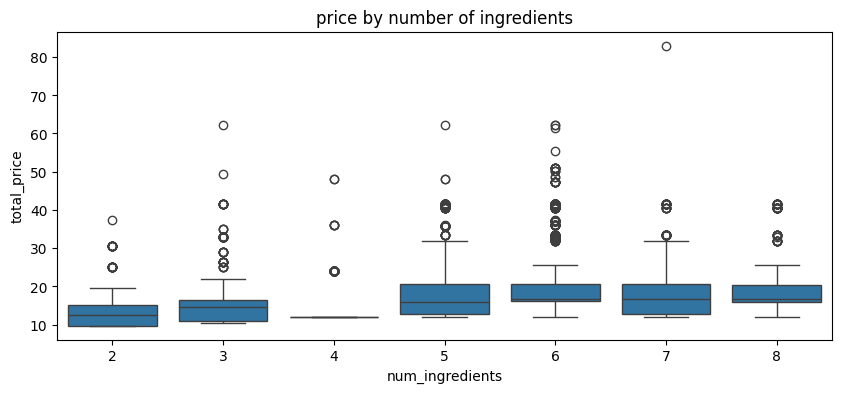

In [102]:
plt.figure(figsize=(10,4))
sns.boxplot(data=for_eda,x='num_ingredients',y='total_price')
plt.title('price by number of ingredients')
plt.show()

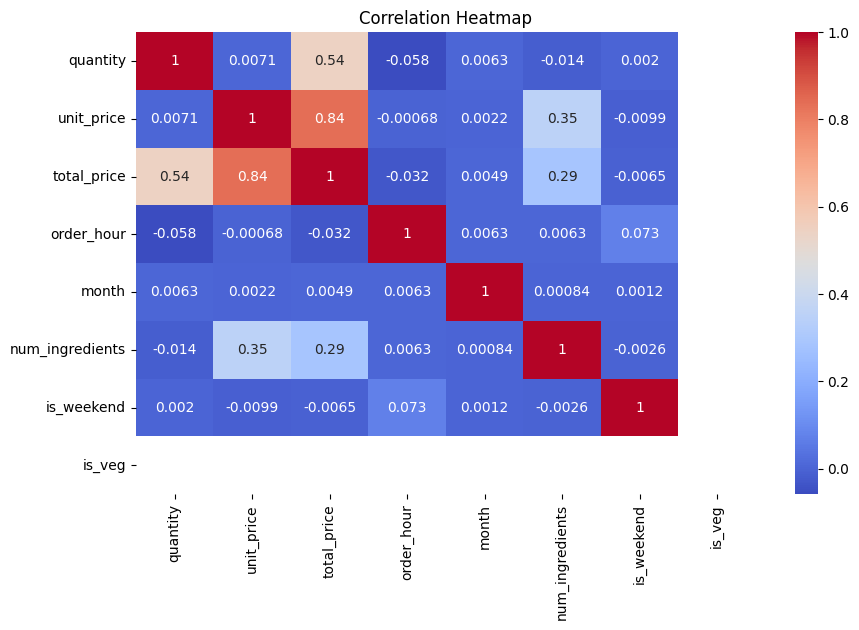

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(for_eda[['quantity', 'unit_price', 'total_price', 'order_hour', 'month', 'num_ingredients', 'is_weekend', 'is_veg']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [104]:
import pandas as pd

# Load the preprocessed data
df = pd.read_pickle("feature_engineered.pkl")

# Aggregate daily sales
daily_sales = df.groupby("order_date")["total_price"].sum().reset_index()
daily_sales.columns = ["ds", "y"]  # Rename for Prophet compatibility


In [129]:
sales=pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\featured_data.xlsx")
data = sales.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)
data.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,7.0,6.0,...,4.0,4.0,1.0,7.0,5.0,2.0,5.0,2.0,8.0,3.0
2015-01-02,12.0,9.0,3.0,7.0,15.0,3.0,2.0,13.0,5.0,6.0,...,6.0,5.0,3.0,9.0,9.0,5.0,3.0,4.0,8.0,1.0
2015-01-03,2.0,3.0,1.0,1.0,6.0,0.0,1.0,4.0,5.0,4.0,...,1.0,2.0,0.0,9.0,4.0,3.0,0.0,5.0,4.0,6.0
2015-01-04,2.0,3.0,0.0,2.0,3.0,3.0,2.0,8.0,7.0,6.0,...,4.0,8.0,6.0,10.0,4.0,4.0,6.0,1.0,3.0,5.0
2015-01-05,6.0,1.0,1.0,4.0,11.0,2.0,5.0,9.0,6.0,4.0,...,5.0,5.0,0.0,6.0,5.0,2.0,4.0,5.0,10.0,6.0


In [111]:
ingredient_df = pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_ingredients_cleaned.xlsx")
ingredient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pizza_name_id       518 non-null    object
 1   pizza_name          518 non-null    object
 2   pizza_ingredients   518 non-null    object
 3   Items_Qty_In_Grams  518 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 16.3+ KB


In [4]:
import pandas as pd

In [36]:
daily_sales=pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\featured_data.xlsx")

# PROPHET MODEL

In [37]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

forecast_list = []
mape_scores = []

for pizza in daily_sales['pizza_name_id'].unique():
    df_pizza = daily_sales[daily_sales['pizza_name_id'] == pizza][['order_date', 'quantity']]
    df_pizza = df_pizza.rename(columns={'order_date': 'ds', 'quantity': 'y'})

    if len(df_pizza) >= 37:
        train = df_pizza[:-7]
        test = df_pizza[-7:]

        model = Prophet()
        model.fit(train)

        future = model.make_future_dataframe(periods=7)
        forecast = model.predict(future)

        pred = forecast[['ds', 'yhat']].tail(7)
        pred = pred.merge(test[['ds', 'y']], on='ds', how='left')
        pred['pizza_name_id'] = pizza

        pred_clean = pred.dropna(subset=['y', 'yhat'])

        if not pred_clean.empty:
            mape = mean_absolute_percentage_error(pred_clean['y'], pred_clean['yhat']) * 100
            mape_scores.append({'pizza_name_id': pizza, 'MAPE': mape})
            forecast_list.append(pred_clean)
        else:
            print(f"⚠️ Skipping MAPE for pizza: {pizza} due to missing values.")

forecast_df = pd.concat(forecast_list)
mape_df = pd.DataFrame(mape_scores)

overall_mape = mean_absolute_percentage_error(forecast_df['y'], forecast_df['yhat']) * 100
print(f"✅ Overall MAPE across all pizzas: {overall_mape:.2f}%")


00:29:50 - cmdstanpy - INFO - Chain [1] start processing
00:29:51 - cmdstanpy - INFO - Chain [1] done processing
00:29:51 - cmdstanpy - INFO - Chain [1] start processing
00:29:51 - cmdstanpy - INFO - Chain [1] done processing
00:29:51 - cmdstanpy - INFO - Chain [1] start processing
00:29:52 - cmdstanpy - INFO - Chain [1] done processing
00:29:52 - cmdstanpy - INFO - Chain [1] start processing
00:29:52 - cmdstanpy - INFO - Chain [1] done processing
00:29:52 - cmdstanpy - INFO - Chain [1] start processing
00:29:52 - cmdstanpy - INFO - Chain [1] done processing
00:29:53 - cmdstanpy - INFO - Chain [1] start processing
00:29:53 - cmdstanpy - INFO - Chain [1] done processing
00:29:53 - cmdstanpy - INFO - Chain [1] start processing
00:29:53 - cmdstanpy - INFO - Chain [1] done processing
00:29:53 - cmdstanpy - INFO - Chain [1] start processing
00:29:54 - cmdstanpy - INFO - Chain [1] done processing
00:29:54 - cmdstanpy - INFO - Chain [1] start processing
00:29:54 - cmdstanpy - INFO - Chain [1]

⚠️ Skipping MAPE for pizza: calabrese_s due to missing values.


00:30:21 - cmdstanpy - INFO - Chain [1] start processing
00:30:21 - cmdstanpy - INFO - Chain [1] done processing


✅ Overall MAPE across all pizzas: 3.42%


In [38]:
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])

daily_sales_grouped = daily_sales.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()

# LINEAR REGRESSION MODEL

In [39]:
from sklearn.linear_model import LinearRegression

mape_scores_lr = []

for pizza in daily_sales_grouped['pizza_name_id'].unique():
    df = daily_sales_grouped[daily_sales_grouped['pizza_name_id'] == pizza][['order_date', 'quantity']]
    
    if len(df) >= 37:
        df['day'] = (df['order_date'] - df['order_date'].min()).dt.days
        train = df[:-7]
        test = df[-7:]

        lr = LinearRegression()
        lr.fit(train[['day']], train['quantity'])

        preds = lr.predict(test[['day']])
        mape = mean_absolute_percentage_error(test['quantity'], preds) * 100

        mape_scores_lr.append({'pizza_name_id': pizza, 'MAPE': mape})
        
df_mape_lr = pd.DataFrame(mape_scores_lr)

# Calculate overall average MAPE
overall_mape_lr = df_mape_lr['MAPE'].mean()

# Print result
print(f"📈 Overall Linear Regression MAPE across all pizzas: {overall_mape_lr:.2f}%")



📈 Overall Linear Regression MAPE across all pizzas: 57.00%


# LSTM MODEL

In [40]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

# Ensure datetime
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])

# Aggregate by day and pizza
daily_sales_grouped = daily_sales.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()

# Store results
lstm_mape_scores = []

# Forecast results for each pizza
selected_pizzas = daily_sales_grouped['pizza_name_id'].unique()[:10]
for pizza in selected_pizzas:
    df_pizza = daily_sales_grouped[daily_sales_grouped['pizza_name_id'] == pizza][['order_date', 'quantity']].copy()
    df_pizza.set_index('order_date', inplace=True)
    df_pizza = df_pizza.sort_index() 
    df_pizza = df_pizza.tail(100) 
    
    if len(df_pizza) >= 37:  # Need at least 30 + 7
        series = df_pizza['quantity'].values.reshape(-1, 1)
        
        # Scale data
        scaler = MinMaxScaler()
        series_scaled = scaler.fit_transform(series)
        
        # Train-test split
        train_size = len(series_scaled) - 7
        train, test = series_scaled[:train_size], series_scaled[train_size:]
        
        # Generator
        n_input = 7
        generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

        # Build model
        

        model = Sequential()
        model.add(Input(shape=(n_input, 1)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mse')

        # Train
        model.fit(generator, epochs=20, verbose=1)

        # Forecast
        history = list(train[-n_input:].flatten())  # flatten to 1D list
        predictions = []

        for _ in range(7):
            input_seq = np.array(history[-n_input:]).reshape((1, n_input, 1))
            yhat = model.predict(input_seq, verbose=0)
            predictions.append(yhat[0][0])
            history.append(yhat[0][0])  # append scalar, not array


        # Inverse transform
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
        actual = scaler.inverse_transform(test).flatten()

        # MAPE
        mape = mean_absolute_percentage_error(actual, predictions) * 100
        lstm_mape_scores.append({'pizza_name_id': pizza, 'MAPE': mape})

# Results
df_mape_lstm = pd.DataFrame(lstm_mape_scores)

# 📊 Overall MAPE
overall_mape_lstm = df_mape_lstm['MAPE'].mean()
print(f"📉 Overall LSTM MAPE across all pizzas: {overall_mape_lstm:.2f}%")


Epoch 1/20


c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0818
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0484
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0554
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0555
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0457
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0453
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0489
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0596
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504 
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0587 
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0493
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0668
Epoch 16/20
86/86 ━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0605
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0512
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0467
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0560
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0655
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0642
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0434
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0486
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0425
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0628
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0483
Epoch 16/20
86/86 ━━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0592
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0481
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0652
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0642
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0435
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0518
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0492
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0610
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0465
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0377
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0423
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0510
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0638
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0593
Epoch 16/20
86/86 ━━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0879
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0513
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0469
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0600
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0457
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0442
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0526
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0509
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0526
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0466
Epoch 16/20
86/86 ━━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0709
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0471  
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0493 
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611 
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0598
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0631
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0573
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0550
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0752
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0557
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0589
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0564
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0570
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545
Epoch 16/20
86/86 ━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0719
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0645
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0672
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0622 
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0477
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0458
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0431
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0506 
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0554
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0544
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0522
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0667
Epoch 16/20
86/86 ━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1298
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0945
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0715
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0755
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0991
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0954
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0708
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0849
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0742
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0753
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0939
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0870
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0713 
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0777
Epoch 16/20
86/86 ━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0376
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0566
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0726
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0305
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0558
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0295
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0442
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0373
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0453
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273
Epoch 16/20
86/86 ━━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1069
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0496
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0588
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0508
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0648
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0598
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0653
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0562
Epoch 13/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0644
Epoch 14/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0622
Epoch 15/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0527
Epoch 16/20
86/86 ━━━━━━━━━━━━

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0395  
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0404
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0394
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0512
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0403
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0460
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0516
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0455
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0566
Epoch 15/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0552
Epoch 16/20
70/70 ━━━━━━━━━━

# SARIMAX MODEL

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
# Ensure date is in datetime format
daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])

# Optional: aggregate if needed
daily_sales_grouped = daily_sales.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()

mape_scores_sarima = []
forecast_list_sarima = []

for pizza in daily_sales_grouped['pizza_name_id'].unique():
    df_pizza = daily_sales_grouped[daily_sales_grouped['pizza_name_id'] == pizza][['order_date', 'quantity']]
    df_pizza.set_index('order_date', inplace=True)

    if len(df_pizza) >= 37:
        train = df_pizza[:-7]
        test = df_pizza[-7:]

        # Simple SARIMA model (tune parameters later)
        model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
        results = model.fit(disp=False)

        forecast = results.forecast(steps=7)
        mape = mean_absolute_percentage_error(test, forecast) * 100

        mape_scores_sarima.append({'pizza_name_id': pizza, 'MAPE': mape})
        forecast_list_sarima.append(pd.DataFrame({
            'ds': test.index,
            'yhat': forecast,
            'y': test['quantity'].values,
            'pizza_name_id': pizza
        }))
df_mape_sarima = pd.DataFrame(mape_scores_sarima)

# Compute the average MAPE
overall_mape_sarima = df_mape_sarima['MAPE'].mean()

# Print the result
print(f"📊 Overall SARIMA MAPE across all pizzas: {overall_mape_sarima:.2f}%")

c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has 

📊 Overall SARIMA MAPE across all pizzas: 56.87%


c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
df_mape_prophet = pd.DataFrame(mape_scores)       # from your Prophet code
df_mape_sarima = pd.DataFrame(mape_scores_sarima)
df_mape_lr = pd.DataFrame(mape_scores_lr)
df_mape_lstm = pd.DataFrame(lstm_mape_scores)


# Merge to compare
mape_comparison = df_mape_prophet.merge(df_mape_sarima, on='pizza_name_id', suffixes=('_Prophet', '_SARIMA'))
mape_comparison = mape_comparison.merge(df_mape_lr, on='pizza_name_id')

mape_comparison.rename(columns={'MAPE': 'MAPE_LR'}, inplace=True)
mape_comparison= mape_comparison.merge(df_mape_lstm,on='pizza_name_id')
mape_comparison.rename(columns={'MAPE': 'MAPE_Lstm'}, inplace=True)

print(mape_comparison.head())

  pizza_name_id  MAPE_Prophet  MAPE_SARIMA    MAPE_LR  MAPE_Lstm
0     bbq_ckn_s      1.589140    53.537070  58.756836  63.725017
1     bbq_ckn_l      9.217605    77.582743  84.318772  86.049238
2    cali_ckn_l      5.011464    82.321089  81.179158  88.763803
3    cali_ckn_m     11.262105    90.278351  90.989494  89.917084
4    cali_ckn_s      0.366766    39.074581  36.590508  35.822209


In [43]:
# Overall comparison
print("📊 Average MAPE per model:")
print("Prophet:", df_mape_prophet['MAPE'].mean())
print("SARIMA:", df_mape_sarima['MAPE'].mean())
print("Linear Regression:", df_mape_lr['MAPE'].mean())
print("LSTM:",overall_mape_lstm)


📊 Average MAPE per model:
Prophet: 2.942626527447519
SARIMA: 56.87197152307868
Linear Regression: 57.00050917883594
LSTM: 70.02628175417581


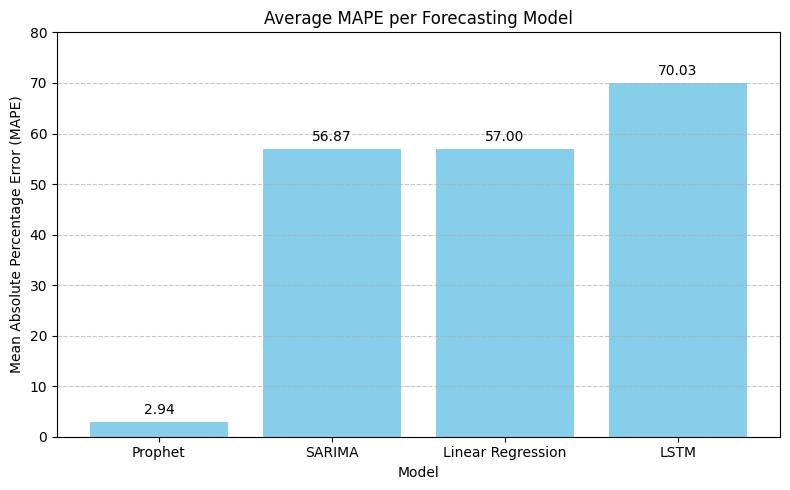

In [45]:
import matplotlib.pyplot as plt
mape_prophet = df_mape_prophet['MAPE'].mean()
mape_sarima = df_mape_sarima['MAPE'].mean()
mape_lr = df_mape_lr['MAPE'].mean()
mape_lstm = overall_mape_lstm

# Data for plotting
models = ['Prophet', 'SARIMA', 'Linear Regression', 'LSTM']
mapes = [mape_prophet, mape_sarima, mape_lr, mape_lstm]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, mapes, color='skyblue')
plt.title('Average MAPE per Forecasting Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Model')
plt.ylim(0, max(mapes) + 10)  # Adjust y-axis for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate MAPE values on bars
for i, val in enumerate(mapes):
    plt.text(i, val + 1, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
from prophet import Prophet

forecast_list = []

for pizza in daily_sales['pizza_name_id'].unique():
    df_pizza = (
    daily_sales[daily_sales['pizza_name_id'] == pizza].groupby('order_date')['quantity'].sum().reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'}))

    df_pizza = df_pizza.rename(columns={'order_date': 'ds', 'quantity': 'y'})

    if len(df_pizza) >= 30:  # at least 30 days of data
        model = Prophet()
        model.fit(df_pizza)

        future = model.make_future_dataframe(periods=7)
        forecast = model.predict(future)

        pred = forecast[['ds', 'yhat']].tail(7)
        pred['pizza_name_id'] = pizza
        forecast_list.append(pred)

forecast_df = pd.concat(forecast_list)

20:26:01 - cmdstanpy - INFO - Chain [1] start processing
20:26:01 - cmdstanpy - INFO - Chain [1] done processing
20:26:01 - cmdstanpy - INFO - Chain [1] start processing
20:26:01 - cmdstanpy - INFO - Chain [1] done processing
20:26:01 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:02 - cmdstanpy - INFO - Chain [1] start processing
20:26:02 - cmdstanpy - INFO - Chain [1] done processing
20:26:03 - cmdstanpy - INFO - Chain [1] start processing
20:26:03 - cmdstanpy - INFO - Chain [1] done processing
20:26:03 - cmdstanpy - INFO - Chain [1] start processing
20:26:03 - cmdstanpy - INFO - Chain [1] done processing
20:26:03 - cmdstanpy - INFO - Chain [1] start processing
20:26:03 - cmdstanpy - INFO - Chain [1] done processing
20:26:04 - cmdstanpy - INFO - Chain [1] start processing
20:26:04 - cmdstanpy - INFO - Chain [1]

# DAILY FORECASTING FOR 7 DAYS

In [31]:
forecast_df.rename(columns={
    'ds': 'date',
    'yhat': 'estimated_pizzas'
}, inplace=True)
forecast_df['estimated_pizzas'] = forecast_df['estimated_pizzas'].clip(lower=0).round(2)
forecast_df = forecast_df.sort_values(by=['pizza_name_id', 'date'])
# Merge back the size info if needed
pizza_sizes = daily_sales[['pizza_name_id', 'pizza_size','pizza_name']].drop_duplicates()
forecast_df = forecast_df.merge(pizza_sizes, on='pizza_name_id', how='left')
forecast_df=round(forecast_df)
forecast_df.to_csv('7_day_pizza_forecast.csv', index=False)


# WEEKLY FORECASTING

In [33]:
# Sum up the estimated pizzas for each pizza over the 7 forecast days
weekly_forecast = (
    forecast_df.groupby('pizza_name_id')['estimated_pizzas']
    .sum()
    .reset_index()
)

# Round the final estimate to integers or desired decimal places
weekly_forecast['estimated_pizzas'] = weekly_forecast['estimated_pizzas'].round()

# Rename for clarity
weekly_forecast.rename(columns={'estimated_pizzas': 'weekly_estimated_pizzas'}, inplace=True)

# Optional: merge size if you need it
if 'pizza_size' in forecast_df.columns:
    pizza_sizes = forecast_df[['pizza_name_id', 'pizza_size','pizza_name']].drop_duplicates()
    weekly_forecast = weekly_forecast.merge(pizza_sizes, on='pizza_name_id', how='left')

# Sort for readability
weekly_forecast = weekly_forecast.sort_values(by='weekly_estimated_pizzas', ascending=False)

weekly_forecast.to_csv('7week_day_pizza_forecast.csv', index=False)


# PURCHASE ORDER

In [23]:
total_pizzas=weekly_forecast['weekly_estimated_pizzas']

In [34]:
ingredient_df = pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_ingredients_cleaned.xlsx")

ingredient_df.rename(columns={
    'pizza_ingredients': 'ingredient',
    'Items_Qty_In_Grams': 'quantity_per_pizza'
}, inplace=True)

# Step 3: Merge forecast with ingredients
merged = pd.merge(weekly_forecast, ingredient_df, on='pizza_name_id', how='left')

# Step 4: Calculate total quantity per ingredient across all pizzas
merged['total_required_grams'] = merged['weekly_estimated_pizzas'] * merged['quantity_per_pizza']

# Step 5: Group by ingredient
purchase_order = merged.groupby('ingredient')['total_required_grams'].sum().reset_index()

# Step 6: Convert to kg
purchase_order['total_required_kg'] = purchase_order['total_required_grams'] / 1000



# Step 7: Output
print("\n🧾 Purchase Order for Next 7 Days (based on forecast):")
print(purchase_order)

# Save to file
purchase_order.to_csv("purchase_order_next_7_days.csv", index=False)


🧾 Purchase Order for Next 7 Days (based on forecast):
                 ingredient  total_required_grams  total_required_kg
0              ?duja Salami                1180.0              1.180
1             Alfredo Sauce                 450.0              0.450
2                 Anchovies                1005.0              1.005
3                Artichokes                3465.0              3.465
4                   Arugula                 410.0              0.410
..                      ...                   ...                ...
59       Sun-dried Tomatoes                 675.0              0.675
60  Thai Sweet Chilli Sauce                1260.0              1.260
61                    Thyme                  70.0              0.070
62                 Tomatoes               14900.0             14.900
63                 Zucchini                1420.0              1.420

[64 rows x 3 columns]
